## SIP - Prediction of Taxi Trip Duration

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the necessary data

In [83]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452695 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1452695 non-null  object        
 1   vendor_id             1452695 non-null  int64         
 2   pickup_datetime       1452695 non-null  datetime64[ns]
 3   dropoff_datetime      1452695 non-null  datetime64[ns]
 4   passenger_count       1452695 non-null  int64         
 5   pickup_longitude      1452695 non-null  float64       
 6   pickup_latitude       1452695 non-null  float64       
 7   dropoff_longitude     1452695 non-null  float64       
 8   dropoff_latitude      1452695 non-null  float64       
 9   trip_duration         1452695 non-null  int64         
 10  dis                   1452695 non-null  float64       
 11  month                 1452695 non-null  int32         
 12  pickup_day            1452695 non-null  in

Independent Variables

    id — a unique identifier for each trip
    vendor_id — a code indicating the provider associated with the trip record
    pickup_datetime — date and time when the meter was engaged
    dropoff_datetime — date and time when the meter was disengaged
    passenger_count — the number of passengers in the vehicle (driver entered value)
    pickup_longitude — the longitude where the meter was engaged
    pickup_latitude — the latitude where the meter was engaged
    dropoff_longitude — the longitude where the meter was disengaged
    dropoff_latitude — the latitude where the meter was disengaged
    store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
    
Target Variable

    trip_duration — duration of the trip in seconds



In [80]:
#We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’
#vendor_id, passenger_count, and trip_duration are of type int.
#pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.


In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.
Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

In [6]:
df.shape

(1458644, 11)

In [8]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [81]:
df['passenger_count'].value_counts()

1    1029343
2     209505
5      77810
3      59696
6      48063
4      28275
7          2
8          1
Name: passenger_count, dtype: int64

### Checking for missing values

In [10]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

no null values in this dataset 

In [11]:
df.duplicated().sum()

0

In [12]:
df[df['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

Passenger Count with value 0 doesn't exist, so removing inaccurate data 

In [13]:
df=df[df['passenger_count']!=0]
df1=df1[df1['passenger_count']!=0]

In [14]:
la1 = df['pickup_latitude'].mean()
la2 = df['dropoff_latitude'].mean()
print("Average Lattitude", (la1+la2)/2)

Average Lattitude 40.751360835787814


In [15]:
lo1 = df['pickup_longitude'].mean()
lo2 = df['dropoff_longitude'].mean()
print("Average Longitude", (lo1+lo2)/2)

Average Longitude -73.97345166289449



#If we see from the means of the latitude and longitude values that we derived above, we see that these values are correct. Also, if we check out these coordinates on a map, we get that the coordinates of (40.7514, -73.9734) correspond to that of NYC. 

### Feature Engineering

Creating a distance attribute

In [16]:
import geopy.distance

def dis_find(row):
    coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geopy.distance.geodesic(coords_1, coords_2).km

df['dis'] = df.apply(lambda row: dis_find(row), axis=1)


In [17]:
df1['dis'] = df1.apply(lambda row: dis_find(row), axis=1)

In [18]:
df['dis']

0          1.502172
1          1.808660
2          6.379687
3          1.483632
4          1.187038
             ...   
1458639    1.227090
1458640    6.046212
1458641    7.821532
1458642    1.092524
1458643    1.133655
Name: dis, Length: 1458584, dtype: float64

In [19]:
df[df['dis']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dis
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,1284,0.0
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,127,0.0
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,566,0.0
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,632,0.0


In [20]:
df=df[df['dis']!=0]
df1=df1[df1['dis']!=0]

In [21]:
df1.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'dis'],
      dtype='object')

In [22]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dis'],
      dtype='object')

In [23]:
df1.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.742863
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.755774
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.307112
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.266978
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.961745


Creating month, day, hour and minutes attribute for accuracy

In [24]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [25]:
df1['pickup_datetime']=pd.to_datetime(df1['pickup_datetime'])

In [26]:
df['month'] = df['pickup_datetime'].dt.month_name()
df1['month'] = df1['pickup_datetime'].dt.month_name()

In [27]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df1['pickup_day']=df1['pickup_datetime'].dt.day_name()

In [28]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute

In [29]:
df1['pickup_hour'] = df1['pickup_datetime'].dt.hour
df1['pickup_min'] = df1['pickup_datetime'].dt.minute

In [30]:
df1.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.742863,June,Thursday,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.755774,June,Thursday,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.307112,June,Thursday,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.266978,June,Thursday,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.961745,June,Thursday,23,59


In [31]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dis,month,pickup_day,pickup_hour,pickup_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,March,Monday,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,June,Sunday,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,January,Tuesday,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,April,Wednesday,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,March,Saturday,13,30


In [32]:
df['pickup_day'].value_counts()

Friday       222605
Saturday     219994
Thursday     217649
Wednesday    209293
Tuesday      201928
Sunday       194553
Monday       186673
Name: pickup_day, dtype: int64

In [33]:
df['month'].value_counts()

March       255204
April       250638
May         247502
February    237336
June        233296
January     228719
Name: month, dtype: int64

In [36]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dis', 'month', 'pickup_day', 'pickup_hour',
       'pickup_min'],
      dtype='object')

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

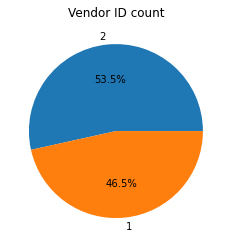

In [37]:
plt.pie(df['vendor_id'].value_counts(), labels = df['vendor_id'].value_counts().index, autopct='%1.1f%%')
plt.title('Vendor ID count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

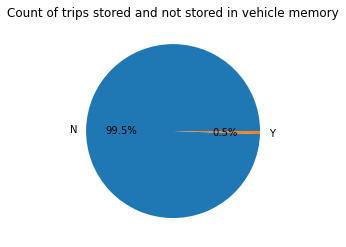

In [38]:
plt.pie(df['store_and_fwd_flag'].value_counts(), labels = df['store_and_fwd_flag'].value_counts().index, autopct='%1.1f%%')
plt.title('Count of trips stored and not stored in vehicle memory')
plt.show

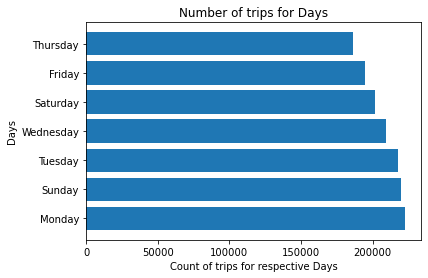

In [39]:
plt.barh(df['pickup_day'].unique(),df['pickup_day'].value_counts())
plt.xlabel('Count of trips for respective Days')
plt.ylabel('Days')
plt.title('Number of trips for Days')
plt.show()

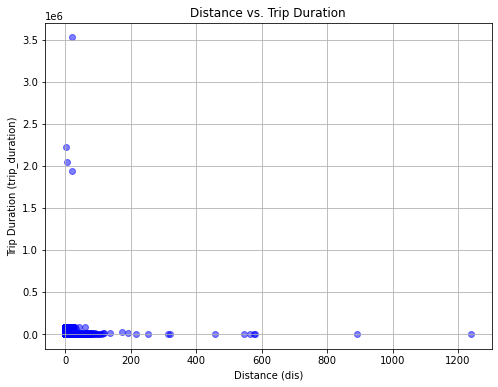

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['dis'], df['trip_duration'], alpha=0.5, color='b')
plt.xlabel('Distance (dis)')
plt.ylabel('Trip Duration (trip_duration)')
plt.title('Distance vs. Trip Duration')
plt.grid(True)
plt.show()

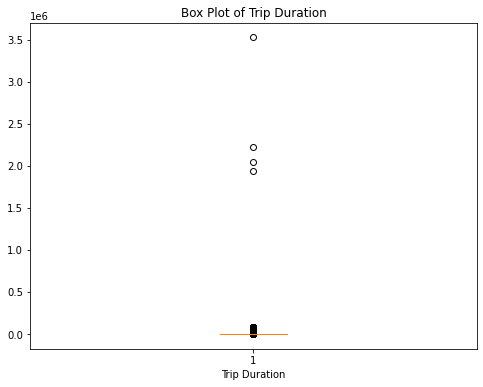

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['trip_duration'])
plt.xlabel('Trip Duration')
plt.title('Box Plot of Trip Duration')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

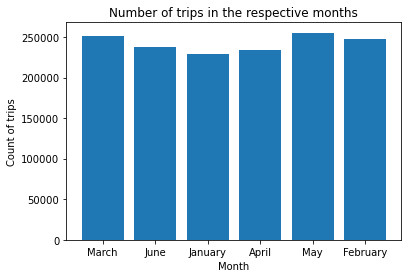

In [43]:
plt.bar(df['month'].unique(), df['month'].value_counts().sort_index())
plt.xlabel('Month')
plt.ylabel('Count of trips')
plt.title('Number of trips in the respective months')
plt.show

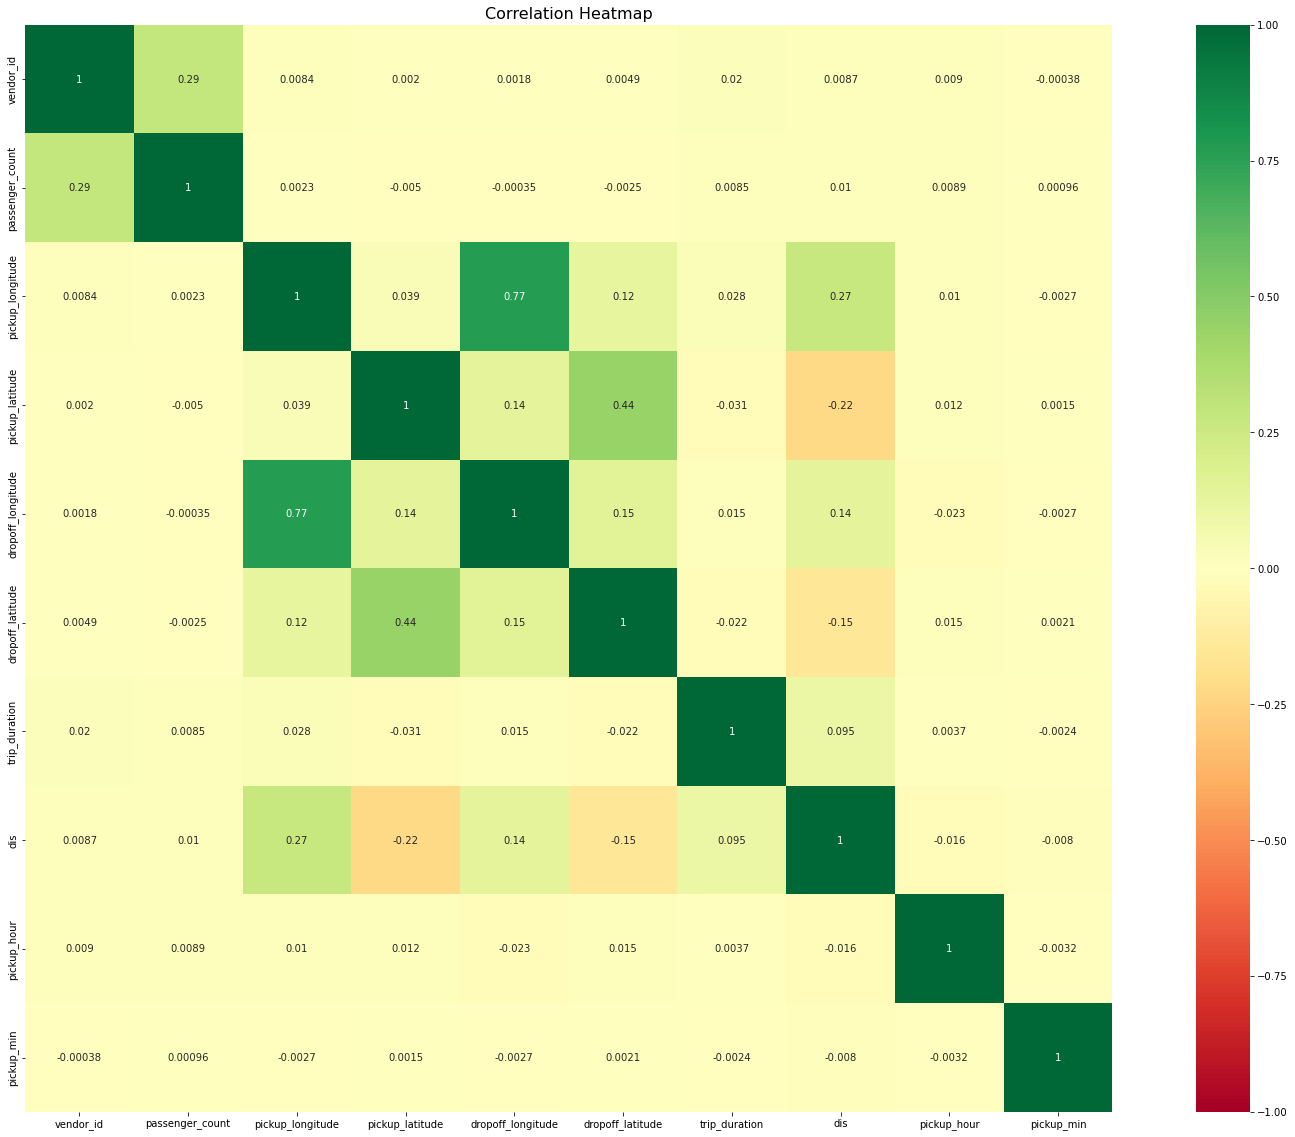

In [44]:
plt.figure (figsize= (30,20))

sns.heatmap(df.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Data Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['pickup_day'] = le.fit_transform(df['pickup_day'])

In [46]:
df1['month'] = le.fit_transform(df1['month'])
df1['pickup_day'] = le.fit_transform(df1['pickup_day'])

In [47]:
df1.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dis,month,pickup_day,pickup_hour,pickup_min
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.742863,3,4,23,59
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.755774,3,4,23,59
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.307112,3,4,23,59
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.266978,3,4,23,59
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.961745,3,4,23,59


In [48]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dis,month,pickup_day,pickup_hour,pickup_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,4,1,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,3,3,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,2,5,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,0,6,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,4,2,13,30


In [49]:
df= pd.get_dummies(df, columns=["store_and_fwd_flag"])

In [50]:
df1= pd.get_dummies(df1, columns=["store_and_fwd_flag"])

In [51]:
X = df.drop(columns = ['id','pickup_datetime','dropoff_datetime','trip_duration'])
y = df['trip_duration']

In [52]:
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dis,month,pickup_day,pickup_hour,pickup_min,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1.502172,4,1,17,24,1,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1.808660,3,3,0,43,1,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.379687,2,5,11,35,1,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1.483632,0,6,19,32,1,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1.187038,4,2,13,30,1,0


In [53]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dis,month,pickup_day,pickup_hour,pickup_min,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.502172,4,1,17,24,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.808660,3,3,0,43,1,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.379687,2,5,11,35,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.483632,0,6,19,32,1,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.187038,4,2,13,30,1,0


### Data Splitting

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size = 0.8,random_state = 2529)

In [85]:
X_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dis,month,pickup_day,pickup_hour,pickup_min,store_and_fwd_flag_N,store_and_fwd_flag_Y
1303900,2,2,-73.992020,40.738182,-73.985275,40.741905,0.703888,3,4,16,38,1,0
1177778,2,1,-73.975800,40.776421,-73.956596,40.781277,1.708397,5,5,13,3,1,0
544081,2,1,-74.011696,40.702831,-73.955437,40.774319,9.252193,0,4,18,17,1,0
727066,2,1,-73.990479,40.755917,-73.994728,40.761810,0.746408,4,0,0,6,1,0
1219599,1,1,-73.978386,40.750877,-73.946587,40.773991,3.714480,0,6,15,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444323,2,1,-73.863724,40.769718,-73.954811,40.767368,7.694822,1,2,17,23,1,0
154616,1,1,-73.987129,40.759361,-73.990517,40.750633,1.010572,3,4,0,12,0,1
1154509,2,1,-73.968437,40.754875,-73.976028,40.744583,1.310451,5,0,16,49,1,0
600033,1,1,-74.000137,40.727119,-73.986519,40.740082,1.842668,2,3,1,44,1,0


### Model Training

Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [57]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dis,month,pickup_day,pickup_hour,pickup_min,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1.502172,4,1,17,24,1,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1.808660,3,3,0,43,1,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.379687,2,5,11,35,1,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1.483632,0,6,19,32,1,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1.187038,4,2,13,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,1.227090,0,0,13,31,1,0
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,6.046212,2,3,7,35,1,0
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,7.821532,0,0,6,57,1,0
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,1.092524,2,5,15,56,1,0


In [58]:
df1 = df1.drop(columns=['id','pickup_datetime'])

In [59]:
df1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dis,month,pickup_day,pickup_hour,pickup_min,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,1,-73.988129,40.732029,-73.990173,40.756680,2.742863,3,4,23,59,1,0
1,1,1,-73.964203,40.679993,-73.959808,40.655403,2.755774,3,4,23,59,1,0
2,1,1,-73.997437,40.737583,-73.986160,40.729523,1.307112,3,4,23,59,1,0
3,2,1,-73.956070,40.771900,-73.986427,40.730469,5.266978,3,4,23,59,1,0
4,1,1,-73.970215,40.761475,-73.961510,40.755890,0.961745,3,4,23,59,1,0


Model Evalutation and Accuracy

In [60]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test, y_pred)

0.028978630005172423

In [61]:
mean_absolute_percentage_error(y_test, y_pred)

0.9545976009449647

In [70]:
df1.columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [69]:
len(df1.columns)==len(X.columns)

True

In [71]:
y_pred1 = lr.predict(df1)

In [73]:
y_pred1

array([ 830.35210846, 1009.31152283,  682.13808847, ..., 1335.40124566,
       2616.31764769, 1321.93187457])

Lasso and Ridge Regression

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test, y_pred)

0.028979178334923028

In [74]:
y_pred1 = lasso.predict(df1)
y_pred1

array([ 830.34629448, 1009.18309424,  682.11511099, ..., 1335.39940543,
       2616.417881  , 1321.92291666])

In [78]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_score(y_test, y_pred)

0.02897863065165296

In [75]:
y_pred1 = ridge.predict(df1)
y_pred1

array([ 830.35207065, 1009.31140318,  682.13806167, ..., 1335.40124447,
       2616.31758042, 1321.93180993])